In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
VERBOSE = True
PUBLISH = True
if not PUBLISH:
    %matplotlib widget
else:
    %matplotlib inline

In [3]:
### 週販レポート
# 標準ライブラリ
import os
import sys
from pathlib import Path
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

import japanize_matplotlib
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
import gamedata as g

In [4]:
# 出力関数登録
def outfunc(fig: Figure) -> None:
    if PUBLISH:
        display(fig)
    else:
        plt.show()
g.set_dispfunc(outfunc)

In [5]:
# レポート日付
from report_config import get_config

config = get_config()
report_date = config["date"]
report_event_mask = g.EventMasks(hard=1.5, price=3, sale=2, soft=1.5, event=1)

def show_title(d:datetime) -> None:
    last_updated_str = d.strftime("%Y-%m-%d")
    mode = "[[LAB MODE]]" if not PUBLISH else ""
    display(Markdown(f"# 国内ゲームハード週販レポート ({last_updated_str}) {mode}"))

if PUBLISH and not VERBOSE:
    g.set_transparent_mode(True)
else:
    g.set_transparent_mode(False)


In [6]:
show_title(report_date)

# 国内ゲームハード週販レポート (2026-01-18) 

* ハードウェアの販売データはファミ通の調査結果を基にしています。
* 2026/1/11は2週合算だったため､データは処理上の都合､週次値に変換するため1/4と1/11に等分しています｡
* [過去の週販レポート](../index.html)

## 直近4週間のハード売り上げ／累計推移

In [7]:
df1 = g.load_hard_sales()
(out1, style1) = g.chart_units_by_date_hw(df1, begin=g.weeks_before(report_date, 3), end=report_date)
display(style1)

年末年始商戦が終わりました｡各機種の販売台数は通常モードです｡

Switch2が7万台を切るのは2025/10/26集計以来です｡
しばらくは5万前後が続いて､2月末のバイオハザード､3月頭の ぽこあポケモンで重点出荷するのかも知れません｡

PS5は1万台を割り込み､値下げ以前の水準に戻りました｡
近い内に何らかのセールでテコ入れが必要だと思います｡

Switchは微増です｡商戦期に盛り上がりが微妙だった分､その終了の影響を受けていません｡
内訳を見るとSwitch2でカバーしきれないニッチをSwitch Liteが埋めているようです｡ 

- Switch 5917台
- Switch Lite 12686台
- SwitchOLED 8631台


## 週販推移

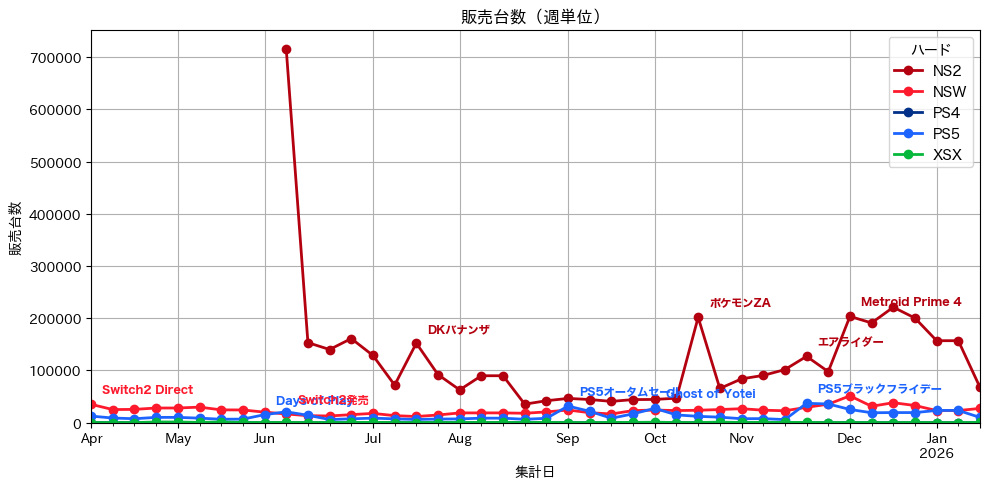

In [8]:
(weekly_fig, weekly_df) = g.plot_sales(begin=g.report_begin(report_date), end=report_date, event_mask=g.EVENT_MASK_MIDDLE)


### 週販推移(拡大）

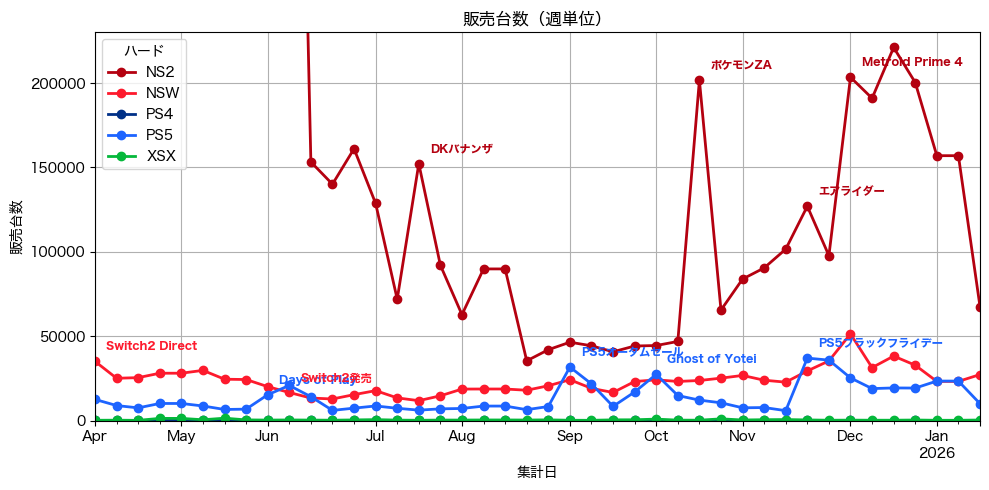

In [9]:
(weekly_big_fig, weekly_big_df) = g.plot_sales(begin=g.report_begin(report_date), end=report_date, ymax=230000, event_mask=g.EVENT_MASK_MIDDLE)


商戦期が終わった後のSwitch2が5万以上で推移するのか､8､9月のように5万以下で推移するのか､
来週の結果に注目です｡

## 月間販売推移

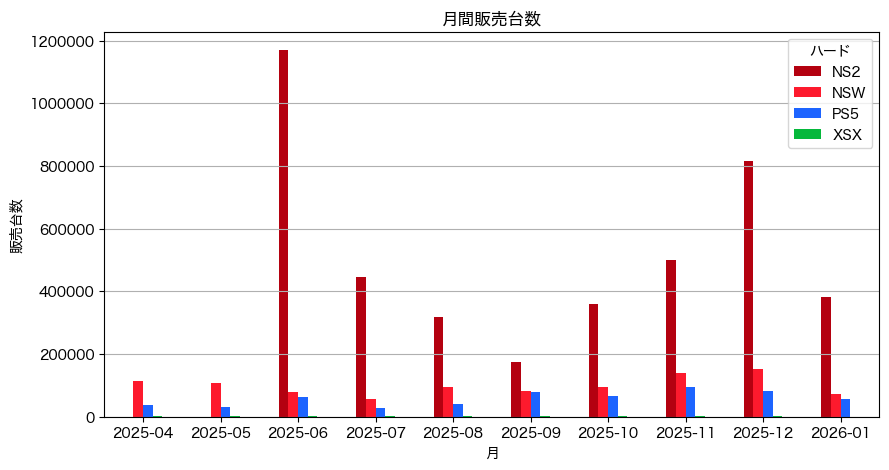

In [10]:
(mbh_fig, mbh_df) = g.plot_monthly_bar_by_hard(hw=["NS2", "PS5", "NSW", "XSX"], 
                                        begin=g.report_begin(report_date), end=report_date,
                                        stacked=False)


In [11]:
if VERBOSE:
    month_style = g.style_sales(mbh_df, gradients=["NS2", "PS5", "NSW", "XSX"])
    display(month_style)

hw,NS2,NSW,PS5,XSX
year_month,,,,
2025-04,0,"113,513","38,983","1,710"
2025-05,0,"106,506","32,001","3,467"
2025-06,"1,169,684","78,097","63,516","1,400"
2025-07,"444,706","57,532","28,959","1,197"
2025-08,"319,690","94,517","39,004","1,599"
2025-09,"175,542","82,946","78,693","1,121"
2025-10,"358,399","96,080","64,732","2,253"
2025-11,"500,414","138,018","93,852","1,891"
2025-12,"815,632","153,619","82,691",895


### Nintendo Switchの月間販売台数： 前々年､前年との比較

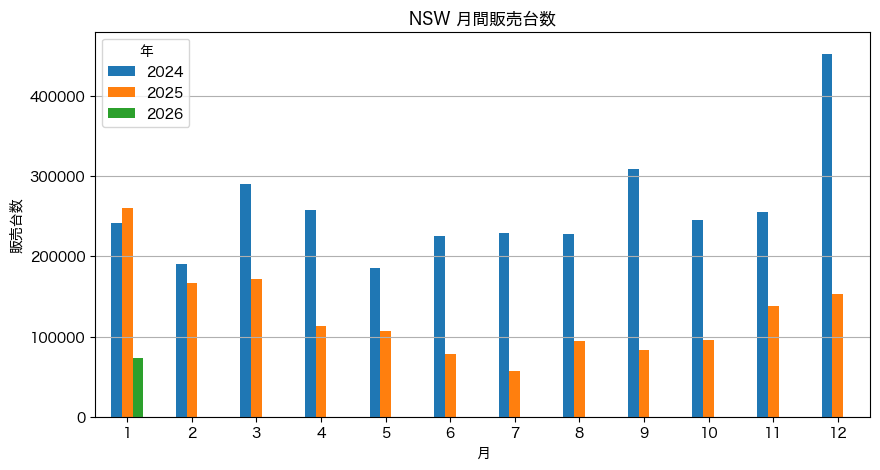

In [12]:
(my_ns_fig, my_ns_df) = g.plot_monthly_bar_by_year(hw="NSW", ymax=480000, begin=g.years_ago(report_date), end=report_date)


In [13]:
if True:
    this_year = report_date.year
    my_ns_df2 = my_ns_df.drop(columns=[this_year - 2])
    my_ns_df2.loc[:, "YoY"] = my_ns_df2.loc[:,this_year] / my_ns_df2.loc[:, this_year - 1]
    my_ns_style = my_ns_df2.style.format({'YoY': '{:.1%}', this_year: '{:,.0f}', this_year - 1: '{:,.0f}'})
    
    display(my_ns_style)

year,2025,2026,YoY
month,,,
1,"260,447","73,594",28.3%
2,"167,188",0,0.0%
3,"171,921",0,0.0%
4,"113,513",0,0.0%
5,"106,506",0,0.0%
6,"78,097",0,0.0%
7,"57,532",0,0.0%
8,"94,517",0,0.0%
9,"82,946",0,0.0%


2026年1月のSwitchはギリギリ10万台に届くかどうか｡前年比は40%に満たない可能性が高いです｡

### PlayStation 5の月間販売台数： 前々年､前年との比較


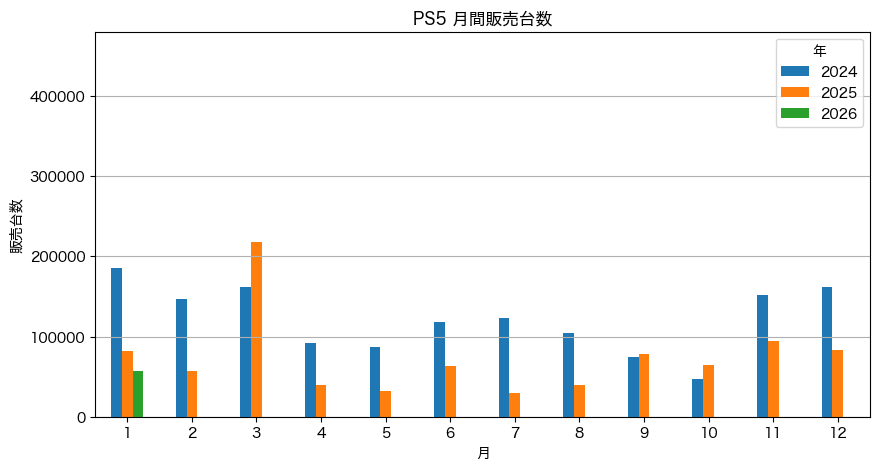

In [14]:
(my_ps5_fig, my_ps5_df) = g.plot_monthly_bar_by_year(hw="PS5", ymax=480000, 
                                        begin=g.years_ago(report_date), end=report_date)


In [15]:
if True:
    this_year = report_date.year
    my_ps5_df2 = my_ps5_df.drop(columns=[this_year - 2])
    my_ps5_df2.loc[:, "YoY"] = my_ps5_df2.loc[:,this_year] / my_ps5_df2.loc[:, this_year - 1]
    ps5_monthly_style = g.style_sales(my_ps5_df2, percent_columns=["YoY"], columns=[this_year, this_year - 1])
    display(ps5_monthly_style)

year,2025,2026,YoY
month,,,
1,"81,587","56,736",69.5%
2,"56,886",0,0.0%
3,"218,300",0,0.0%
4,"38,983",0,0.0%
5,"32,001",0,0.0%
6,"63,516",0,0.0%
7,"28,959",0,0.0%
8,"39,004",0,0.0%
9,"78,693",0,0.0%


先週のレポートで､昨年の1月を超える可能性に言及しましたが､
今週の4桁の結果を見るに､2025年1月を上回るのは難しくなってきました｡


## 累計販売推移


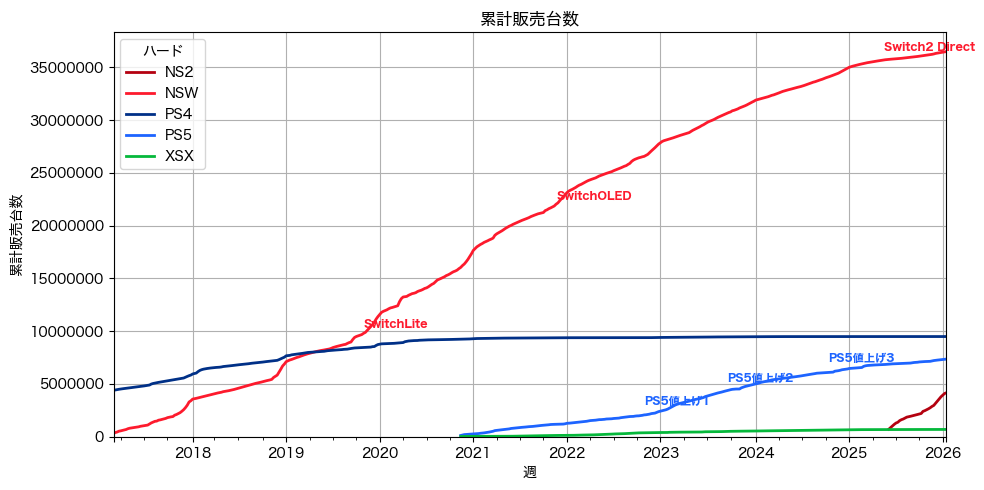

In [16]:
long_range_event_mask = g.EventMasks(hard=0.5, soft=0, event=0, price=0, sale=0)
(cumulative_sales_fig, cumulative_sales_df) = g.plot_cumulative_sales(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], begin=datetime(2017,3,1), event_mask = g.EVENT_MASK_LONG)


In [17]:
cs_style = g.style_sales(cumulative_sales_df.tail(1), datetime_index=True)
display(cs_style) if VERBOSE else None

hw,NS2,NSW,PS4,PS5,XSX
report_date,,,,,
2026-01-18,"4,165,414","36,489,755","9,491,082","7,354,946","690,138"


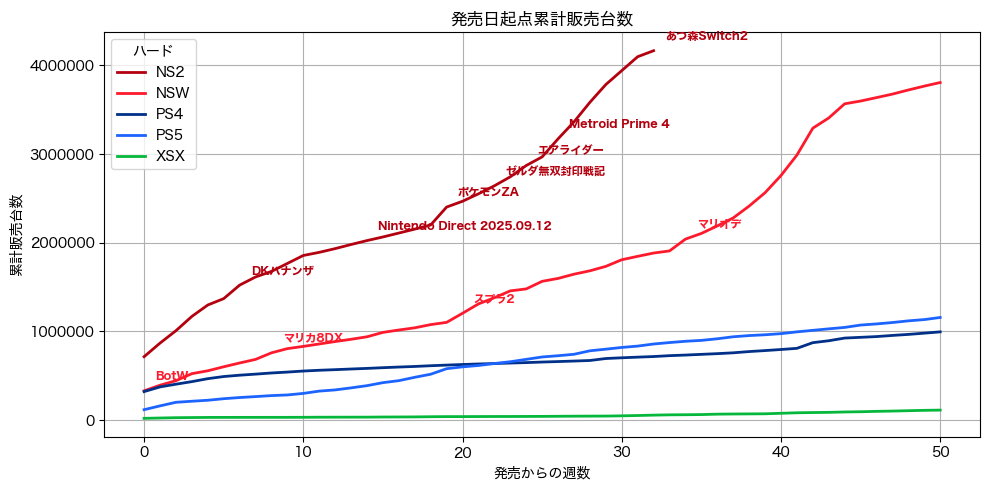

In [18]:
(csd_fig, csd_df) = g.plot_cumulative_sales_by_delta(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], end=50, event_mask= g.EVENT_MASK_SHORT)


Switch2は同時期のSwitchの2.2倍の普及速度を継続しています｡

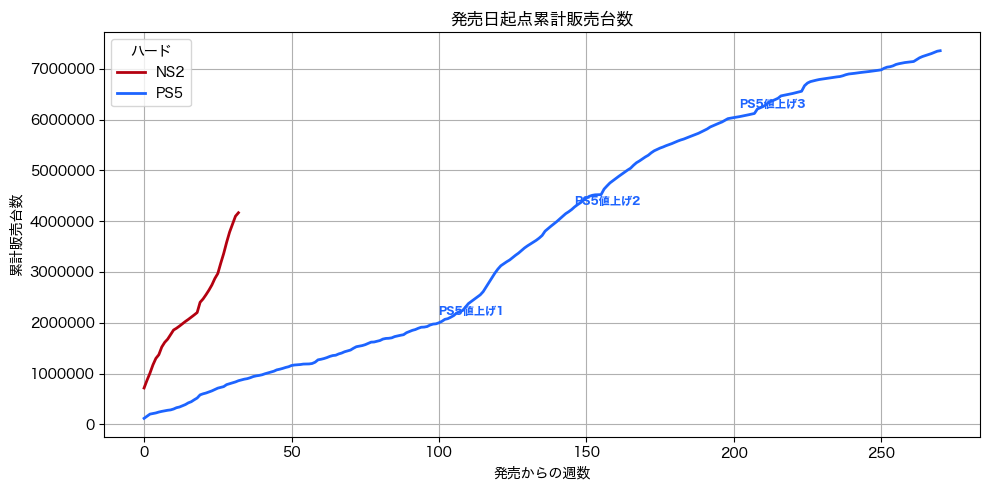

In [19]:
(csd2_fig, csd2_df) = g.plot_cumulative_sales_by_delta(hw=['NS2', 'PS5'], end=280, event_mask=g.EVENT_MASK_LONG)


勢いの差を見やすくするために､Nintendo Switch2とPlayStation5だけの累計推移グラフを示します｡
Switch2はPS5に比べると垂直立ち上げと呼べるような立ち上がりをしていることが分かると思います｡

## Switch2初動状況

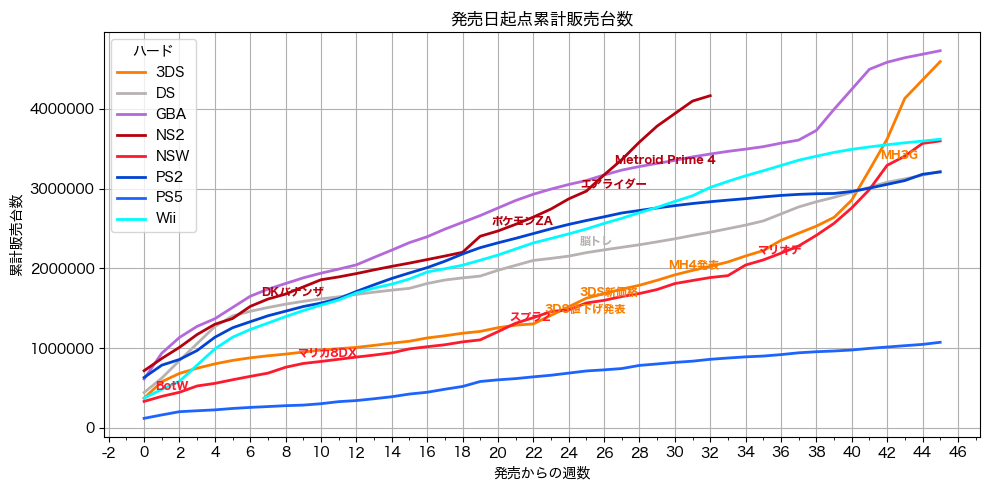

In [20]:
(csd_ns2_fig, csd_ns2_df) = g.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS", "NSW", "PS5"], 
                                        mode="week", xgrid=2, end=45,
                                        event_mask=g.EVENT_MASK_MIDDLE)


In [21]:
df12 = csd_ns2_df.iloc[csd_ns2_df.index == 32]
# df12をunpivotして、列名を"ハード"、"販売数"にする
df12_unpivot = df12.unstack().reset_index()
df12_unpivot.columns = ['ハード', '週数', '販売数']
df12_unpivot.sort_values(by='販売数', ascending=False, inplace=True)
df12_unpivot.set_index('ハード', inplace=True)

styled_df12_unpivot = g.style_sales(df12_unpivot, columns=['販売数'], bars=['販売数'])
display(styled_df12_unpivot)

,週数,販売数
ハード,,
NS2,32,"4,165,414"
GBA,32,"3,433,896"
Wii,32,"3,014,828"
PS2,32,"2,835,230"
DS,32,"2,452,593"
3DS,32,"2,024,869"
NSW,32,"1,884,235"
PS5,32,"858,583"


この先､10週間程度はSwitch2は歴代トップは確定です｡
しかし､それ以後はGBA,DSが急上昇します｡
Switch2が歴代トップを維持するかどうかは､この先の出荷状況次第です｡


## 年単位の状況


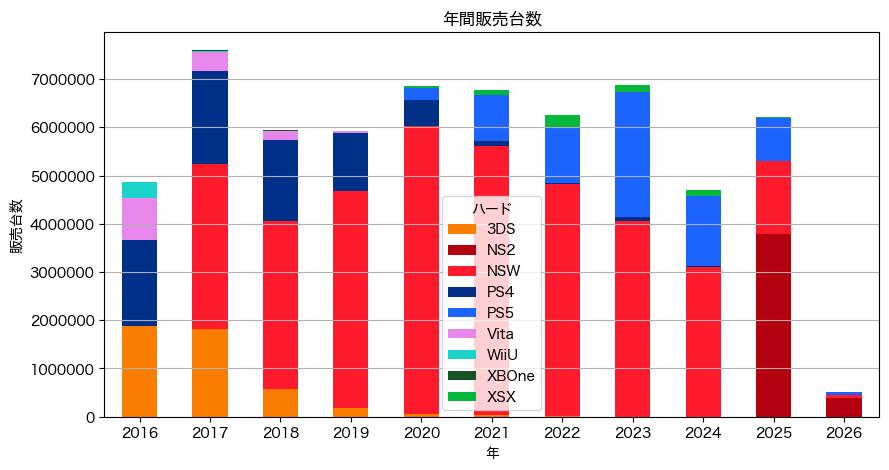

In [22]:
(yb_fig, yb_df) = g.plot_yearly_bar_by_hard(hw=['PS4', 'PS5', 'NSW', 'NS2', '3DS', 'WiiU', 'Vita', 'XSX', 'XBOne'], 
                                       begin=g.years_ago(report_date, 10),
                                       end=report_date, stacked=True)

In [23]:
yb_df["合計"] = yb_df.sum(axis=1)
yearly_style = g.style_sales(yb_df)
display(yearly_style)

hw,3DS,NS2,NSW,PS4,PS5,Vita,WiiU,XBOne,XSX,合計
year,,,,,,,,,,
2016,"1,874,457",0,0,"1,790,883",0,"865,002","336,151","8,897",0,"4,875,390"
2017,"1,827,131",0,"3,407,158","1,935,247",0,"396,207","21,817","14,664",0,"7,602,224"
2018,"566,420",0,"3,482,388","1,695,227",0,"181,728",0,"15,339",0,"5,941,102"
2019,"191,173",0,"4,493,903","1,196,153",0,"37,668",0,"8,315",0,"5,927,212"
2020,"62,761",0,"5,956,943","542,647","255,150",0,0,"3,585","31,424","6,852,510"
2021,"28,540",0,"5,579,127","104,054","968,185",0,0,0,"97,234","6,777,140"
2022,"10,664",0,"4,804,546","22,823","1,154,054",0,0,0,"269,737","6,261,824"
2023,"3,033",0,"4,062,609","73,292","2,587,468",0,0,0,"141,712","6,868,114"
2024,162,0,"3,109,103","13,728","1,454,149",0,0,0,"118,221","4,695,363"


### 年単位のメーカーシェア

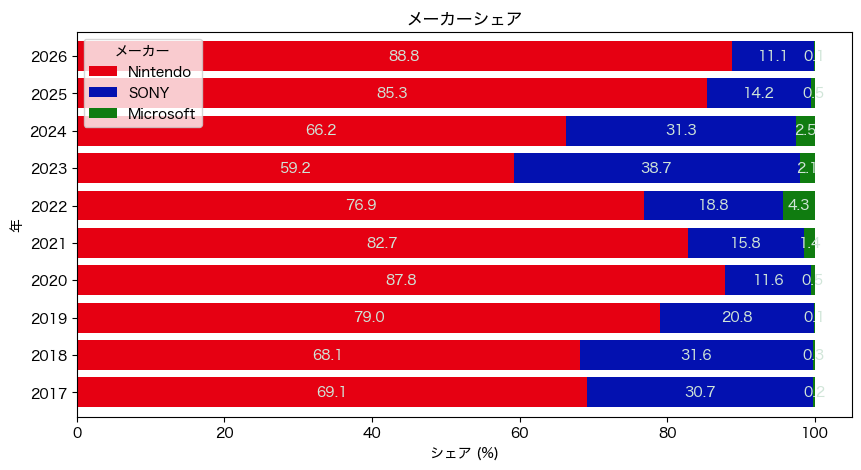

In [24]:
(msb_fig, msb_df) = g.plot_maker_share_bar(begin=datetime(2017, 1, 1))

今週､PS5が四桁だった影響で任天堂のシェアはさらに上昇し､先週の88.4%から88.8%になりました｡

In [25]:
if VERBOSE:
    share_style = msb_df.style.format("{:.1f}%")  # シェア率をパーセント表示する場合
    share_style = share_style.background_gradient(cmap='Blues', axis=0)
    display(share_style)

maker_name,Nintendo,SONY,Microsoft
year,,,
2017,69.1%,30.7%,0.2%
2018,68.1%,31.6%,0.3%
2019,79.0%,20.8%,0.1%
2020,87.8%,11.6%,0.5%
2021,82.7%,15.8%,1.4%
2022,76.9%,18.8%,4.3%
2023,59.2%,38.7%,2.1%
2024,66.2%,31.3%,2.5%
2025,85.3%,14.2%,0.5%


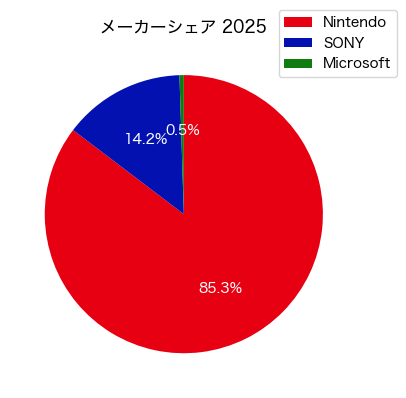

In [26]:
if VERBOSE:
    (fig, df) = g.plot_maker_share_pie(begin_year=2025, end_year=2025)